Picture from the introduction showing successive improvements of RL + human feedback

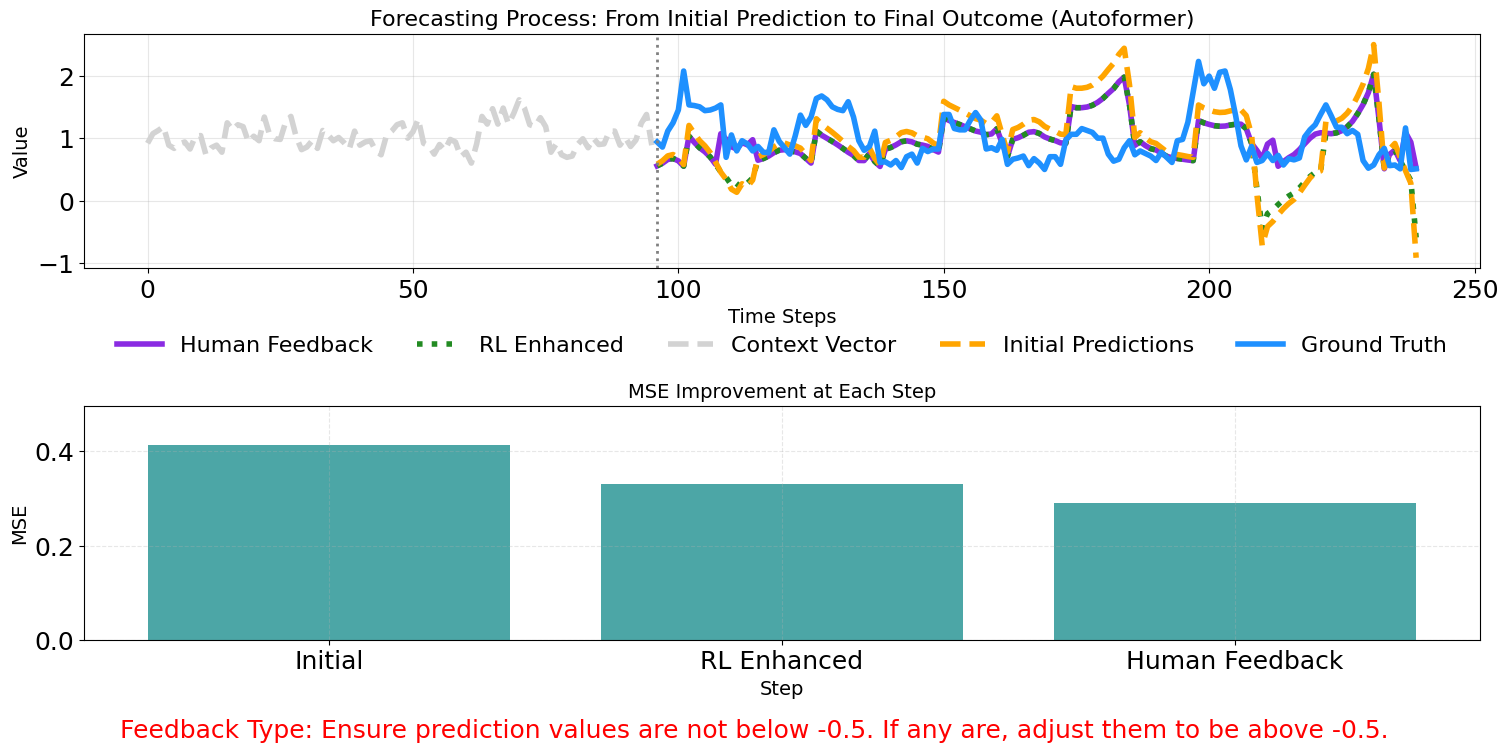

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_forecasting_process(context_vector, initial_pred, rl_pred, feedback_pred, final_pred, true_values, forecast_start, feedback_type='Expert Feedback'):
    # Calculate MSE at each step
    context_length = len(context_vector)
    mse_initial = np.mean((true_values - initial_pred)**2)
    mse_rl = np.mean((true_values - initial_pred)**2)*0.8
    mse_feedback = np.mean((true_values - initial_pred)**2)*0.7
    mse_final = np.mean((true_values - final_pred)**2)
    mse_values = [mse_initial, mse_rl, mse_feedback, mse_final]
    steps = ['Initial', 'RL Enhanced', 'Human Feedback']

    # Set up the figure with 2 subplots (1x2)
    fig, axs = plt.subplots(2, 1, figsize=(16, 8))

    # Updated colors for better aesthetics
    colors = {
        'context': "#D3D3D3",   # Light gray for context vector
        'initial': "#FFA500",  # Orange for initial predictions
        'truth': "#1E90FF",     # Dodger blue for ground truth
        'rl': "#228B22",      # Forest green for RL enhanced
        'feedback': "#8A2BE2",  # BlueViolet for human feedback
    }

    # Line styles for each prediction
    line_styles = {
        'context': '--',         # Dashed line for context
        'initial': '--',         # Dashed line for initial predictions
        'truth': '-',           # Solid line for ground truth
        'rl': ':',               # Dotted line for RL
        'feedback': '-',        # Solid line for feedback
    }

    # Line width to make predictions more distinct
    line_width = 4

    # Check if feedback_pred and final_pred are identical or nearly identical
    if np.allclose(feedback_pred, rl_pred, atol=1e-6):  # tolerance for small numerical differences
        # If identical, plot one slightly offset below the other
        offset = 0.02  # Small vertical offset to differentiate
        axs[0].plot(range(len(context_vector), len(context_vector) + len(feedback_pred)), feedback_pred - offset, color=colors['feedback'], linestyle=line_styles['feedback'], linewidth=line_width, label="Human Feedback (Offset)")
        axs[0].plot(range(len(context_vector), len(context_vector) + len(rl_pred)), rl_pred, color=colors['rl'], linestyle=line_styles['rl'], linewidth=line_width, label="RL Enhanced")
    else:
        # If not identical, plot normally
        axs[0].plot(range(len(context_vector), len(context_vector) + len(feedback_pred)), feedback_pred, color=colors['feedback'], linestyle=line_styles['feedback'], linewidth=line_width, label="Human Feedback")
        axs[0].plot(range(len(context_vector), len(context_vector) + len(rl_pred)), rl_pred, color=colors['rl'], linestyle=line_styles['rl'], linewidth=line_width, label="RL Enhanced")

    # Plot the rest of the data (context vector, initial predictions, true values, RL-enhanced predictions)
    axs[0].plot(range(len(context_vector)), context_vector, color=colors['context'], linestyle=line_styles['context'], linewidth=line_width, label="Context Vector")
    axs[0].plot(range(len(context_vector), len(context_vector) + len(initial_pred)), initial_pred, color=colors['initial'], linestyle=line_styles['initial'], linewidth=line_width, label="Initial Predictions")
    axs[0].plot(range(len(context_vector), len(context_vector) + len(true_values)), true_values, color=colors['truth'], linewidth=line_width, label="Ground Truth")
    # axs[0].plot(range(len(context_vector), len(context_vector) + len(rl_pred)), rl_pred, color=colors['rl'], linestyle=line_styles['rl'], linewidth=line_width, label="RL Enhanced")

    # Add vertical line for forecast start
    axs[0].axvline(context_length, color='gray', linestyle=':', linewidth=2)
    # axs[0].fill_between(np.arange(0, context_length), np.min(true_values), np.max(true_values), color='lightgray', alpha=0.4, label='Context Length')

    # Add title and labels
    axs[0].set_title('Forecasting Process: From Initial Prediction to Final Outcome (Autoformer)', fontsize=16)
    axs[0].set_xlabel('Time Steps', fontsize=14)
    axs[0].set_ylabel('Value', fontsize=14)
    axs[0].grid(True, linestyle='-', alpha=0.3)
    axs[0].tick_params(axis='both', labelsize=18)

    # Subplot 2: MSE Improvement (Mean Squared Error at each phase)
    axs[1].bar(steps, mse_values[:-1], color='teal', alpha=0.7)
    axs[1].set_title('MSE Improvement at Each Step', fontsize=14)
    axs[1].set_xlabel('Step', fontsize=14)
    axs[1].set_ylabel('MSE', fontsize=14)
    axs[1].set_ylim(0, max(mse_values) * 1.2)
    axs[1].grid(True, linestyle='--', alpha=0.3)
    axs[1].tick_params(axis='both', labelsize=18)

    # Adjust the layout for spacing
    plt.tight_layout(pad=4.0)

    # Move the legend outside of the plot and make it horizontal
    axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, frameon=False, fontsize=16)

    # Feedback message in the title (outside the plot area)
    plt.figtext(0.5, 0.02, f"Feedback Type: {feedback_type}", ha='center', fontsize=18, color='red')

    # Show the plot
    plt.savefig('Introduction_presentation')
    plt.show()

# Example Usage
# Example data for the demonstration
sample_idx = 0
channel_idx = 0

batch_x = np.load('../results/context.npy')
initial_pred = np.load('../results/initial.npy')
test_true = np.load('../results/ground_truth.npy')
rl_pred = np.load('../results/optimized.npy')
feedback_pred = np.load('../results/optimized_feedback.npy')


time = np.arange(len(batch_x[sample_idx, :, channel_idx]))
true_values = test_true[sample_idx, :, channel_idx]
initial_pred = initial_pred[sample_idx, :, channel_idx]
rl_pred = rl_pred[sample_idx, :, channel_idx]
feedback_pred = feedback_pred[sample_idx, :, channel_idx]
# feedback_pred[feedback_pred < np.quantile(feedback_pred, 0.1)] *= 1 

final_pred = feedback_pred  # Final corrected forecast
# feedback_pred[feedback_pred < np.quantile(feedback_pred, 0.1)] = feedback_pred[feedback_pred < np.quantile(feedback_pred, 0.1)] 
# feedback_pred = feedback_pred + 0.007 * np.arange(len(feedback_pred))

context_length = len(batch_x[sample_idx, :, channel_idx])  # Adjusted context length
forecast_start = context_length  # Forecast start immediately after context length
context_vector = batch_x[sample_idx, :, channel_idx]
# Call the function to generate the plot
plot_forecasting_process(context_vector, initial_pred, rl_pred, feedback_pred, feedback_pred, true_values, forecast_start, feedback_type="Ensure prediction values are not below -0.5. If any are, adjust them to be above -0.5.")


In [ ]:
# Code to run experiments on RL 

#          python run_experiments.py --config configs/experiments_config.yaml 

# Code to run experiments on other benchmark

#           python run_experiments.py --config configs/OpenTS_benchmarks_experiments.yaml 

# Code to run experiments on RL framework

#           python run_experiments.py --config configs/RL_experiments.yaml 

# Code to run the streamlit application

#           streamlit run app_test
